**Exponential Model.**

In this notebook data of a number of countries is used to train a model per each country to be used to predict the daily cases on a specifc day.

In [0]:
# Importing Libraries
import pickle
import numpy as np
import math
from google.colab import drive
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

Connceting to google Drive to Read the dataset.

In [54]:
drive.mount('/content/drive')
DATA_PATH = "/content/drive/My Drive"
file = open(DATA_PATH+'/new_cases_dict.pickle','rb')
dataset = pickle.load(file)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Defining the functions that will be used later in traing, testing the model , predicting new values in the testing phase and to calculate the mean square error. 

In [0]:
# this function returns the value of the exponential function F(X) = a*e^(b*X)
def func_exp(x, a, b):           
        return a * np.exp(b * x) 
# This function is used to train the model and returns the model parammeters (a and b)
def exponential_regression (x_data, y_data):    
    popt, pcov = curve_fit(func_exp, x_data, y_data, p0 = (-1, 1e-6))
    print(popt)
    puntos = plt.plot(x_data, y_data, 'x', color='xkcd:maroon', label = "data")
    curva_regresion = plt.plot(x_data, func_exp(x_data, *popt), color='xkcd:teal', label = "fit: {:.3f}, {:.3f}, {:.3f}".format(*popt))
    plt.legend()
    plt.show()
    return func_exp(x_data, *popt)
#this function is used to predict new values of the of cases in the testing phase
def func_predict(a,b,x):
        return (a*math.exp(b*x))
# this function is used to calculate the mean square error for the testing phase
def func_MeanSquareError(Y_true,Y_pred,a,b):
  squareSum=0
  for i in range(len(Y_true)):
    squareSum+=math.pow((abs(Y_true[i])-abs(Y_pred[i])),2)
  return  squareSum/len(Y_true)


Extracting Italy's *DataSet* from the datasets dictionary and then cleaning it by removing the unwanted records, and the the data is normalized to be in range 0 to 1,which will give us better results and the the data is splitted into trainin and testing datasets.

In [56]:
italy=dataset.get("Italy")            #Extracting Italy's data from the dataset dictionary
italy=np.delete(italy,0,axis=1)       #Deleting the extra ad unused dimensionality from Italy's Data set
italy=italy[53:len(italy)-50]        #Cleaning Italy's Dataset (Removing unwanted Records) and converting the arraylist to a numpy array

for i in range(len(italy)):            #Normalizing the  dataset so all the values are from 0 to 1 using the equation x=(x-min(x))/(max(x)-min(x))
    italy[i]=(italy[i]-min(italy))/(max(italy)-min(italy))
# Initializing 
italyTrain=[]                        # Initializing an empty list to be used for the  training dataset to train the model     
italyTest=[]                         # Initializing an empty list to be used for the  Testing dataset to test the model
italyTestDays=[]                     # Initializing an empty list to be used for the  Testing dataset to Test the model (converting dates into days)
italyPredict=[]                      # Initializing an empty list to be used for predictions that results from the testing stage

#Splitting the dataset into trainig dataset and testing dataset
for i in range(len(italy)):                 
  if(i<len(italy)-10):
    italyTrain.append(italy[i][0])
  else:
    italyTest.append(italy[i][0])
    italyTestDays.append(i)

italyTrain=np.asarray(italyTrain)     #Converting Trainig list into numpy array          
print(len(italyTrain))
print(len(italyTest))
print(italyTest)

26
10
[0.6416043922525545, 0.8116516699710233, 0.9129174927558334, 1.0, 0.9036242483341459, 0.7783195189338534, 0.85307979847229, 0.8467414269462051, 1.0, 1.0]


Extracting Germany's *DataSet* from the datasets dictionary ,and then cleaning it by removing the unwanted records, and the the data is normalized to be in range 0 to 1,which will give us better results and the the data is splitted into trainin and testing datasets.

In [57]:
germany=dataset.get("Germany")            #Extracting Germany's data from the dataset dictionary
germany=np.delete(germany,0,axis=1)       #Deleting the extra ad unused dimensionality from Germany's Data set
germany=germany[56:len(germany)-30]        #Cleaning Germany's Dataset (Removing unwanted Records) and converting the arraylist into a numpy array

for i in range(len(germany)):            #Normalizing the  dataset so all the values are from 0 to 1 using the equation x=(x-min(x))/(max(x)-min(x))
    germany[i]=(germany[i]-min(germany))/(max(germany)-min(germany))
# Initializing 
germanyTrain=[]                        # Initializing an empty list to be used for the  training dataset to train the model     
germanyTest=[]                         # Initializing an empty list to be used for the  Testing dataset to test the model
germanyTestDays=[]                     # Initializing an empty list to be used for the  Testing dataset to Test the model (converting dates into days)
germanyPredict=[]                      # Initializing an empty list to be used for predictions that results from the testing stage

#Splitting the dataset into trainig dataset and testing dataset
for i in range(len(germany)):                 
  if(i<len(germany)-10):
    germanyTrain.append(germany[i][0])
  else:
    germanyTest.append(germany[i][0])
    germanyTestDays.append(i)

germanyTrain=np.asarray(germanyTrain)     #Converting Trainig list into numpy array          
print(len(germanyTrain))
print(len(germanyTest))
print(germanyTest)

43
10
[0.7520195378545933, 0.9344354687206462, 1.0, 1.0, 0.8346153846153846, 0.7505917159763313, 0.6159763313609468, 0.7355029585798817, 0.8479289940828403, 1.0]


Extracting France's *DataSet* from the datasets dictionary and then cleaning it by removing the unwanted records, and the the data is normalized to be in range 0 to 1,which will give us better results and the the data is splitted into trainin and testing datasets.

In [65]:
france=dataset.get("France")            #Extracting France's data from the dataset dictionary
france=np.delete(france,0,axis=1)       #Deleting the extra ad unused dimensionality from France's Data set
france=france[58:len(france)-38]        #Cleaning France's Dataset (Removing unwanted Records) and converting the arraylist into a numpy array

for i in range(len(france)):            #Normalizing the  dataset so all the values are from 0 to 1 using the equation x=(x-min(x))/(max(x)-min(x))
    france[i]=(france[i]-min(france))/(max(france)-min(france))
# Initializing 
franceTrain=[]                        # Initializing an empty list to be used for the  training dataset to train the model     
franceTest=[]                         # Initializing an empty list to be used for the  Testing dataset to test the model
franceTestDays=[]                     # Initializing an empty list to be used for the  Testing dataset to Test the model (converting dates into days)
francePredict=[]                      # Initializing an empty list to be used for predictions that results from the testing stage

#Splitting the dataset into trainig dataset and testing dataset
for i in range(len(france)):                 
  if(i<len(france)-10):
    franceTrain.append(france[i][0])
  else:
    franceTest.append(france[i][0])
    franceTestDays.append(i)

franceTrain=np.asarray(franceTrain)     #Converting Trainig list into numpy array          
print(len(franceTrain))
print(len(franceTest))
print(franceTest)

33
10
[0.5774610715228292, 1.0, 0.9289126695967896, 0.40435696541180965, 1.0, 1.0, 0.4787832310838446, 1.0, 0.9732027827879413, 1.0]


 **Traing And Testing Italy's Model**
The normalized points are fitted to a curve against the days and then fitted curve is being plotted to be displayed as a curve.
Then the model is tested.Firstly the testing data is being used to predict the new weighted number of cases by using the Predict function, then the Mean Square Error is calculated .

The Model Parameters:

a= 0.023.

b=0.132.

Mean Square Error = 0.198


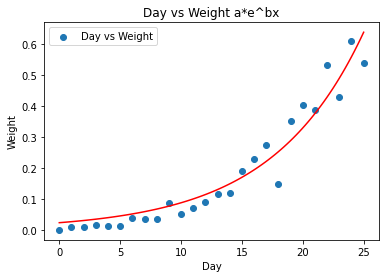

The equation of regression line is y=0.023e^(0.132x)
a= 0.023     b= 0.132
Mean Square Error =  0.47426247208759725


In [59]:
day=np.arange(0, len(italyTrain))                                           # Setting the range of the Days
popt, pcov = curve_fit(func_exp, day, italyTrain, p0=[1, 1e-6])             # Training Italy's Model
# Plotting The Model 
x_plot=np.linspace(0,25,100)
plt.plot(x_plot, func_exp(x_plot, *popt), 'r')                               #Plotting the weights of Fitted model curve against the days
plt.scatter(day,italyTrain,label='Day vs Weight')                            #Scattering the points to be drawn on the chart
plt.title("Day vs Weight a*e^bx")                                           # Adding Title to the chart
plt.xlabel('Day')                                                            # Adding label to the X-axis
plt.ylabel('Weight')                                                         # Adding label to the Y-axis
plt.legend()                                                                 # Adding Legends to the Chart 
plt.show()                                                                   # Displaying the Italy's model output chart
# Extracting model Parameters for the equation f(x)= a*e^(b*x)
a=popt[0].round(3)                                                          #Getting the value of a rounded to 3 decimal places
b=popt[1].round(3)                                                          #Getting the value of b rounded to 3 decimal places

for i in range(len(italyTestDays)):               
  italyPredict.append(func_predict(a,b,italyTestDays[i]))
print(f'The equation of regression line is y={a}e^({b}x)')

print('a=',a,'    b=',b)                                                    # Displaying Model Parameters (a and b)

MeanSquareError=func_MeanSquareError(italyTest,italyPredict,a,b)            #Calculating the Mean square error
print('Mean Square Error = ',MeanSquareError)                               # Displaying the Mean Square Error


**Traing And Testing Germany's Model**

The normalized points are fitted to a curve against the days and then fitted curve is being plotted to be displayed as a curve.
Then the model is tested.Firstly the testing data is being used to predict the new weighted number of cases by using the Predict function, then the Mean Square Error is calculated .

The Model Parameters: 

a= 0.079    

b= 0.063

Mean Square Error = 0.675



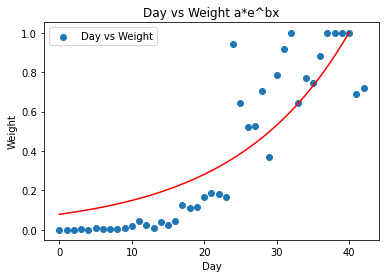

The equation of regression line is y=0.079e^(0.063x)
a= 0.079     b= 0.063
Mean Square Error =  0.6752353062656281


In [60]:
day=np.arange(0, len(germanyTrain))                                           # Setting the range of the Days
popt, pcov = curve_fit(func_exp, day, germanyTrain, p0=[1, 1e-6])             # Training Germany's Model
# Plotting The Model 
x_plot=np.linspace(0,40,100)
plt.plot(x_plot, func_exp(x_plot, *popt), 'r')                               #Plotting the weights of Fitted model curve against the days
plt.scatter(day,germanyTrain,label='Day vs Weight')                            #Scattering the points to be drawn on the chart
plt.title("Day vs Weight a*e^bx")                                           # Adding Title to the chart
plt.xlabel('Day')                                                            # Adding label to the X-axis
plt.ylabel('Weight')                                                         # Adding label to the Y-axis
plt.legend()                                                                 # Adding Legends to the Chart 
plt.show()                                                                   # Displaying the Germany's model output chart
# Extracting model Parameters for the equation f(x)= a*e^(b*x)
a=popt[0].round(3)                                                          #Getting the value of a rounded to 3 decimal places
b=popt[1].round(3)                                                          #Getting the value of b rounded to 3 decimal places

for i in range(len(germanyTestDays)):               
  germanyPredict.append(func_predict(a,b,germanyTestDays[i]))
print(f'The equation of regression line is y={a}e^({b}x)')

print('a=',a,'    b=',b)                                                    # Displaying Model Parameters (a and b)

MeanSquareError=func_MeanSquareError(germanyTest,germanyPredict,a,b)            #Calculating the Mean square error
print('Mean Square Error = ',MeanSquareError)                               # Displaying the Mean Square Error


**Training And Testing France’s Model**

The normalized points are fitted to a curve against the days and then fitted curve is being plotted to be displayed as a curve.
Then the model is tested.Firstly the testing data is being used to predict the new weighted number of cases by using the Predict function, then the Mean Square Error is calculated .

The Model Parameters: 

a= 0.02.

b=0.105.

Mean Square Error = 0.164.



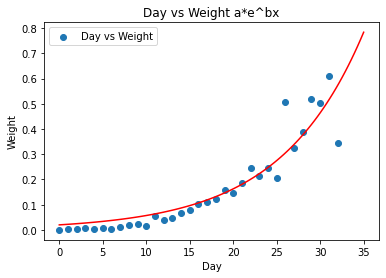

The equation of regression line is y=0.02e^(0.105x)
a= 0.02     b= 0.105
Mean Square Error =  0.16448190765314333


In [69]:
day=np.arange(0, len(franceTrain))                                           # Setting the range of the Days
popt, pcov = curve_fit(func_exp, day, franceTrain, p0=[1, 1e-6])             # Training France's Model
# Plotting The Model 
x_plot=np.linspace(0,35,100)
plt.plot(x_plot, func_exp(x_plot, *popt), 'r')                               #Plotting the weights of Fitted model curve against the days
plt.scatter(day,franceTrain,label='Day vs Weight')                            #Scattering the points to be drawn on the chart
plt.title("Day vs Weight a*e^bx")                                           # Adding Title to the chart
plt.xlabel('Day')                                                            # Adding label to the X-axis
plt.ylabel('Weight')                                                         # Adding label to the Y-axis
plt.legend()                                                                 # Adding Legends to the Chart 
plt.show()                                                                   # Displaying the France's model output chart
# Extracting model Parameters for the equation f(x)= a*e^(b*x)
a=popt[0].round(3)                                                          #Getting the value of a rounded to 3 decimal places
b=popt[1].round(3)                                                          #Getting the value of b rounded to 3 decimal places

for i in range(len(franceTestDays)):               
  francePredict.append(func_predict(a,b,franceTestDays[i]))
print(f'The equation of regression line is y={a}e^({b}x)')

print('a=',a,'    b=',b)                                                    # Displaying Model Parameters (a and b)

MeanSquareError=func_MeanSquareError(franceTest,francePredict,a,b)            #Calculating the Mean square error
print('Mean Square Error = ',MeanSquareError)                               # Displaying the Mean Square Error
